In [1]:
# The imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#%matplotlib inline

In [2]:
# Candy for Mandy/ removes warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('LoanStats3a.csv',skiprows=1)
# print(data.keys())
# data.info()

In [4]:
test = data['hardship_last_payment_amount']
test = pd.DataFrame(test)
# test.head()

In [5]:
#Creating a smaller dataframe with relevent information beginning with getting rid of columns with too little or no info
# Columns  0,1,18,28,29,47,50,53,54,55,57-77,80-104,107-121,123-136,138
cln_data = data.iloc[0:42536,[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20,21,22,23,24,25,26,27,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,51,52,56,78,79,105,106,122,137]]
# cln_data.tail(10)


In [6]:
sample = cln_data['collections_12_mths_ex_med']
sample = pd.DataFrame(sample)
# sample.info()

In [7]:
Keys = list(cln_data.keys())
# print(Keys)
#application_type = 45

In [8]:
clnr_data = cln_data.iloc[:,[0,1,3,4,5,9,10,11,12,14,17,18,21,22,23,24,25,26,27,28,29,31,33,35,36,41]]
# clnr_data.tail(50)

In [9]:
dropped = clnr_data.dropna()
print(dropped.dtypes)

loan_amnt              float64
funded_amnt            float64
term                    object
int_rate                object
installment            float64
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
loan_status             object
purpose                 object
title                   object
dti                    float64
delinq_2yrs            float64
earliest_cr_line        object
inq_last_6mths         float64
open_acc               float64
pub_rec                float64
revol_bal              float64
revol_util              object
total_acc              float64
out_prncp              float64
total_pymnt            float64
total_rec_prncp        float64
total_rec_int          float64
last_pymnt_amnt        float64
dtype: object


In [10]:
dropped = clnr_data.dropna()
# dropped.shape
dropped.keys()
dropped.home_ownership.value_counts()

RENT        19696
MORTGAGE    18471
OWN          3019
OTHER         134
NONE            4
Name: home_ownership, dtype: int64

In [11]:
# Correlation Coefficient
def r(x,y):

    corr_mat = np.corrcoef(x,y)
    if corr_mat[0,1] >= .6:
        return "Correlation Coefficient is " + str(corr_mat[0,1]) + " which is a strong positive corrleation"
    elif corr_mat[0,1] <= -.6:
        return "Correlation Coefficient is " + str(corr_mat[0,1]) + " which is a strong negative correlation"
    else:
         return "Correlation Coefficient is " + str(corr_mat[0,1])+ " which is weak sauce and you can't say nuffin"


In [12]:
# x axis will be loan amount, interest rate, term (only 2 unique values though)
# y axis will be every other column to see if there is a correlation between certain values 

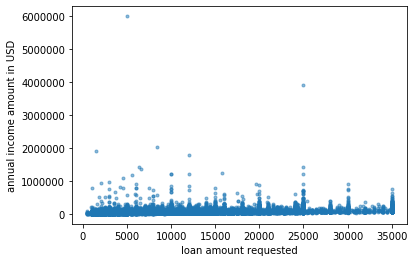

In [13]:
plt.plot(dropped['loan_amnt'], dropped['annual_inc'], marker = '.', linestyle = 'none', alpha = .5)
_ = plt.xlabel('loan amount requested')
_ = plt.ylabel('annual income amount in USD')


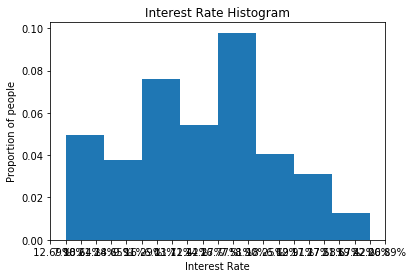

In [14]:
x_int_rate = dropped.int_rate
bins = [5,7.5,10,12.5,15,17.5,20,22.5,25]
plt.hist(x_int_rate,bins = bins, normed = True)
_ = plt.xlabel('Interest Rate')
_ = plt.ylabel('Proportion of people')
_ = plt.title('Interest Rate Histogram')
plt.show()

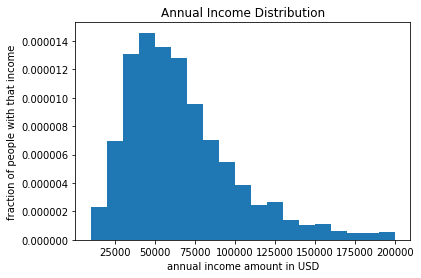

In [15]:
x = pd.to_numeric(dropped['annual_inc'])
bins = [10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,110000,120000,130000,140000,150000,160000,170000,180000,190000,200000]
plt.hist(x, bins = bins, normed = True)
#plt.xlim(left = 0, right = 200000)
_ = plt.title('Annual Income Distribution')
_ = plt.xlabel('annual income amount in USD')
_ = plt.ylabel('fraction of people with that income')

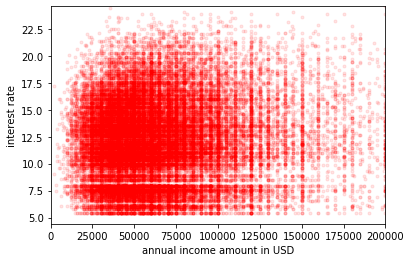

"Correlation Coefficient is 0.052206508519246755 which is weak sauce and you can't say nuffin"

In [17]:
dropped.int_rate = dropped['int_rate'].apply(lambda x: x.replace('%',''))
dropped.int_rate = pd.to_numeric(dropped.int_rate)
plt.plot( dropped['annual_inc'], dropped.int_rate, marker = '.', linestyle = 'none', alpha = .1, color = 'red')
plt.xlim(left = 0, right = 200000)
plt.ylim(bottom = min(dropped.int_rate)-1, top = max(dropped.int_rate))
_ = plt.xlabel('annual income amount in USD')
_ = plt.ylabel('interest rate')
plt.show()
r(dropped['annual_inc'], dropped.int_rate)

In [18]:
int_rate = pd.DataFrame(dropped.int_rate)
annual_inc = pd.DataFrame(dropped['annual_inc'])
#sns.heatmap(annual_inc, int_rate)

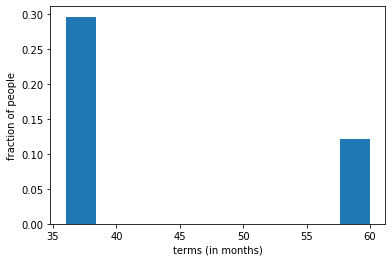

In [19]:
term = list(dropped['term'].apply(lambda x: x.replace('months','')).head(100))
plt.hist(pd.to_numeric(term), normed = True)
_ = plt.xlabel('terms (in months)')
_ = plt.ylabel('fraction of people')

In [20]:
emp_len =pd.DataFrame(dropped.emp_length)
unique_list = []
for x in emp_len.emp_length :
    if x not in unique_list :
        unique_list.append(x)
print(unique_list)


['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years', '4 years', '5 years', '6 years', '2 years', '7 years']


Index(['10+ years', '< 1 year', '2 years', '3 years', '4 years', '1 year',
       '5 years', '6 years', '7 years', '8 years', '9 years'],
      dtype='object')


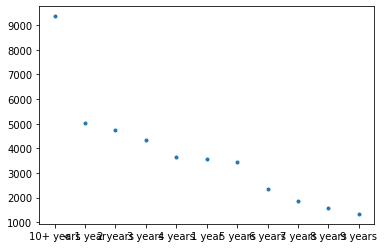

In [21]:
emp_len =pd.DataFrame(dropped.emp_length)
small_df = emp_len.emp_length.value_counts()
#small_df = small_df.sort_index('< 1 year','1 year', '2 years', '3 years', '4 years', '5 years',
 #      '6 years', '7 years', '8 years', '9 years', '10+ years')
plt.plot(small_df, linestyle = 'none', marker = '.') 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
print(small_df.keys())

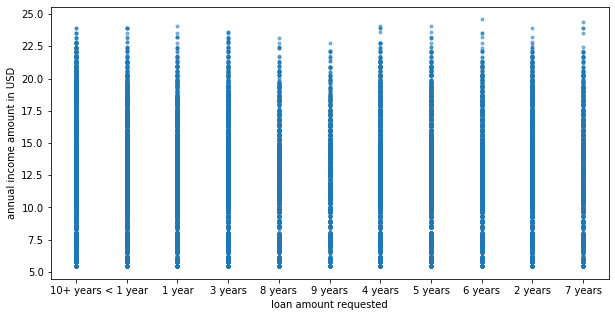

In [22]:
plt.plot(dropped.emp_length, int_rate, marker = '.', linestyle = 'none', alpha = .5)
_ = plt.xlabel('loan amount requested')
_ = plt.ylabel('annual income amount in USD')


In [23]:
# Needs to be for looped, but for now we're just trying to gather the info we need (makes good practice though)
# Note: 10 means 10+ years and 0 means less than a year, there were no 0's present in data prior, so it works
dropped = dropped.apply(lambda x: x.replace('< 1 year','0'))
dropped = dropped.apply(lambda x: x.replace('1 year','1'))
dropped = dropped.apply(lambda x: x.replace('10+ years','10'))
dropped = dropped.apply(lambda x: x.replace('2 years','2'))
dropped = dropped.apply(lambda x: x.replace('3 years','3'))
dropped = dropped.apply(lambda x: x.replace('4 years','4'))
dropped = dropped.apply(lambda x: x.replace('5 years','5'))
dropped = dropped.apply(lambda x: x.replace('6 years','6'))
dropped = dropped.apply(lambda x: x.replace('7 years','7'))
dropped = dropped.apply(lambda x: x.replace('8 years','8'))
dropped = dropped.apply(lambda x: x.replace('9 years','9'))
dropped.emp_length = pd.to_numeric(dropped.emp_length)
print(dropped.emp_length.head(20))

0     10
1      0
2     10
3     10
4      1
5      3
6      8
7      9
8      4
9      0
10     5
11    10
12     0
13     3
14     3
15     0
16     4
17    10
18     1
19     6
Name: emp_length, dtype: int64


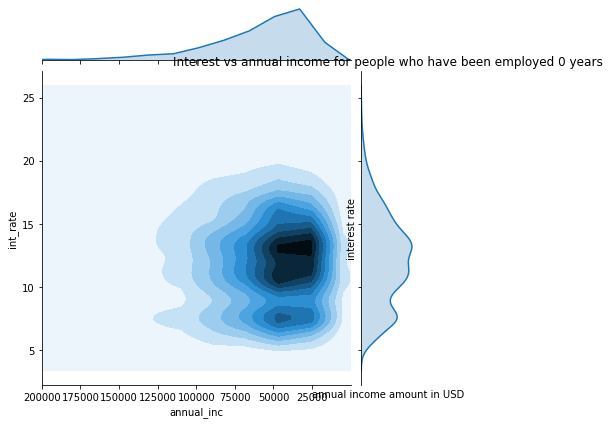

0.05819315857222649
---------------------------------------------------------------------------------------------------


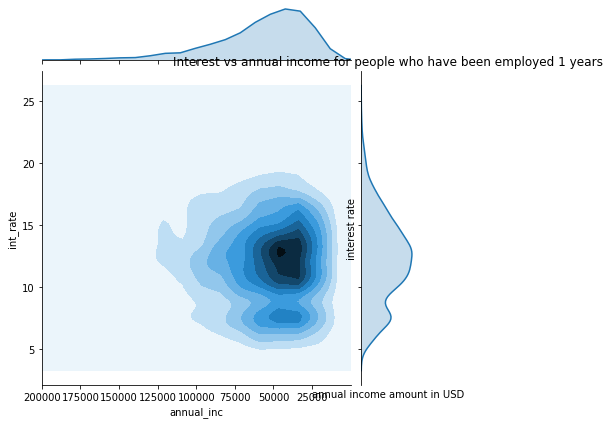

0.04674448827287675
---------------------------------------------------------------------------------------------------


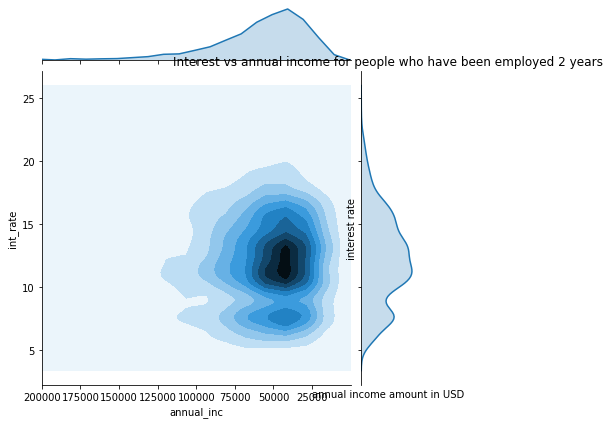

0.055282763033148934
---------------------------------------------------------------------------------------------------


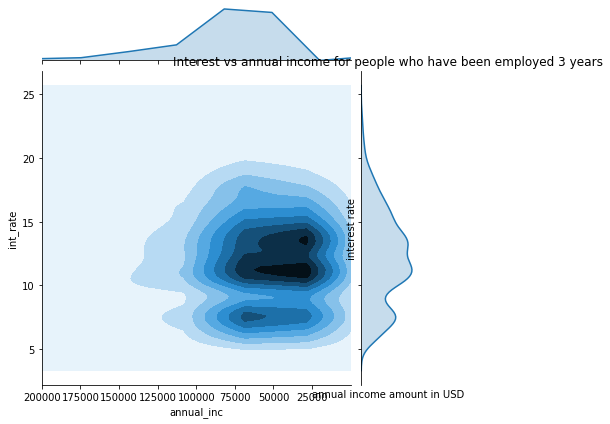

0.026982479559303895
---------------------------------------------------------------------------------------------------


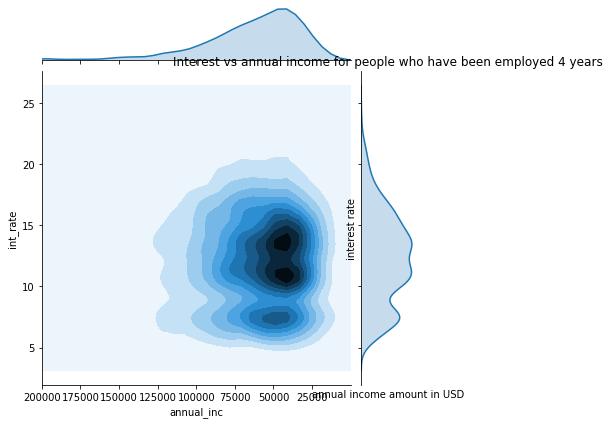

0.06855075876431418
---------------------------------------------------------------------------------------------------


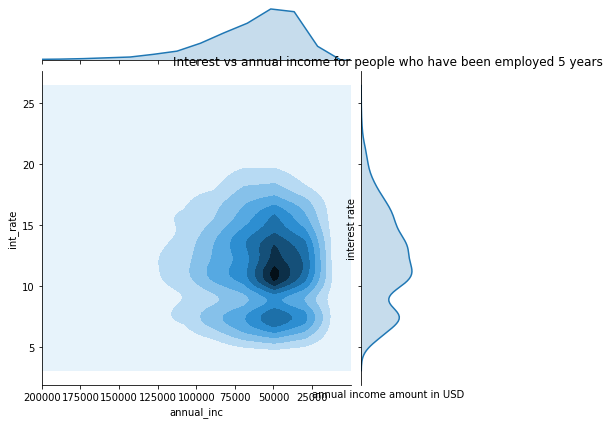

0.045519180976404144
---------------------------------------------------------------------------------------------------


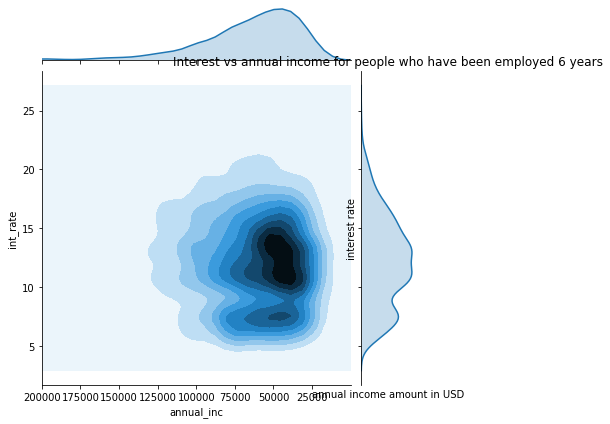

0.1168691316610719
---------------------------------------------------------------------------------------------------


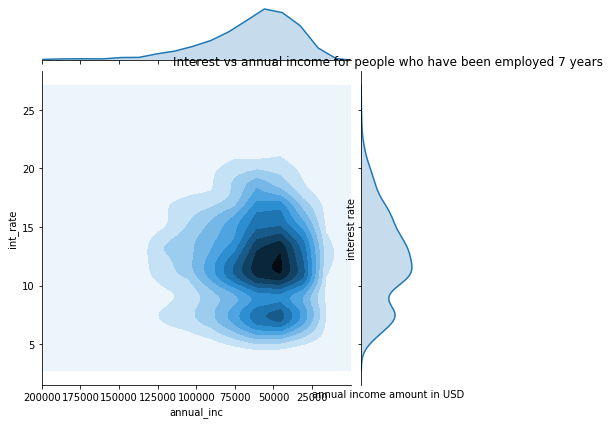

0.036730083057539116
---------------------------------------------------------------------------------------------------


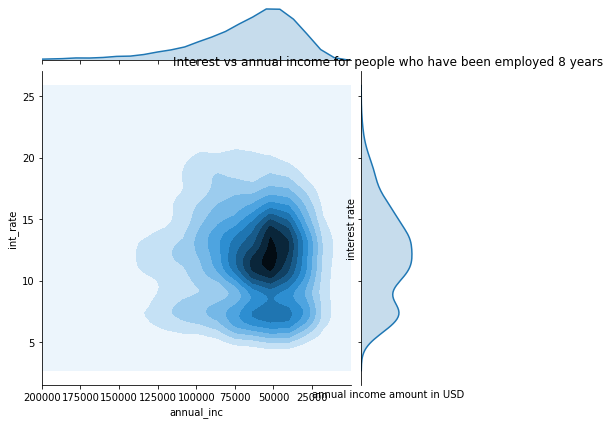

0.07770446934437875
---------------------------------------------------------------------------------------------------


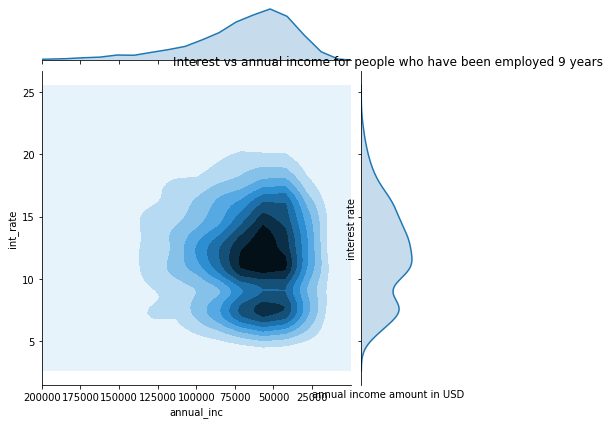

0.02002775071895982
---------------------------------------------------------------------------------------------------


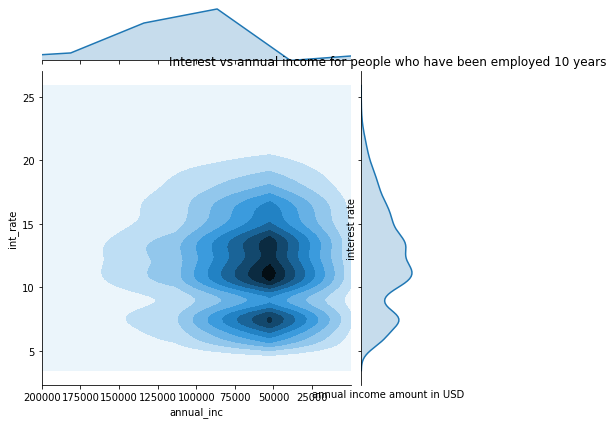

0.057651855334722245
---------------------------------------------------------------------------------------------------


In [24]:
dropped_emp = dropped.sort_values('emp_length') #Did not have to do this, but I'm no degenerate
d = {}
means = []
for x in range (0,11):
    d["empsort_{0}".format(x)]= pd.DataFrame(dropped_emp[dropped.emp_length == x])    
    sns.jointplot(x = d["empsort_{0}".format(x)]['annual_inc'], y = d["empsort_{0}".format(x)].int_rate, kind = 'kde', xlim = 200000)
    # plt.plot( d["empsort_{0}".format(x)]['annual_inc'], d["empsort_{0}".format(x)].int_rate, marker = '.', linestyle = 'none', alpha = .1, color = 'cyan')
    # plt.xlim(left = 0, right = 200000)
    _ = plt.xlabel('annual income amount in USD')
    _ = plt.ylabel('interest rate')
    _ = plt.title('Interest vs annual income for people who have been employed ' + str(x) +' years')
    plt.show()
    corr_mat = np.corrcoef(d["empsort_{0}".format(x)]['annual_inc'], d["empsort_{0}".format(x)].int_rate)
    means.append(np.mean(d["empsort_{0}".format(x)].int_rate))
    print(corr_mat[1,0])
    print("---------------------------------------------------------------------------------------------------")
# The r function is not printing, but holy schnapps we got it
# x values on plot are flipped in direction, so thats weird

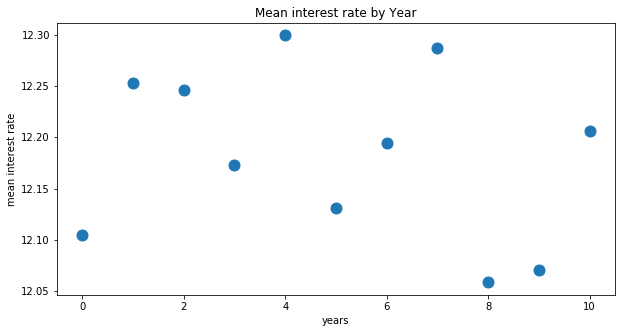

In [25]:
# Lets see if the mean of our 
plt.plot(means , linestyle = 'none', marker = '.', markersize = 22)
_ = plt.title('Mean interest rate by Year')
_ = plt.xlabel('years')
_ = plt.ylabel('mean interest rate')

In [26]:
print(d['empsort_2'].shape)

(4736, 26)


In [27]:
for x in range (0,11):
    print(d["empsort_{0}".format(x)].shape)

(5028, 26)
(3583, 26)
(4736, 26)
(4358, 26)
(3638, 26)
(3451, 26)
(2369, 26)
(1871, 26)
(1589, 26)
(1338, 26)
(9363, 26)


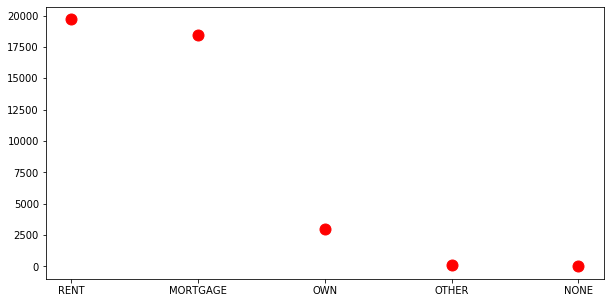

In [28]:
home_own = dropped.home_ownership.value_counts()
plt.plot(home_own, marker = '.', linestyle = 'none', color = 'red', markersize = 22)

In [29]:
dropped.home_ownership.value_counts()
# The None category does not have enough data points to make any significant claim so we are dropping those

RENT        19696
MORTGAGE    18471
OWN          3019
OTHER         134
NONE            4
Name: home_ownership, dtype: int64

In [30]:
dropped = dropped.apply(lambda x: x.replace('RENT','0'))
dropped = dropped.apply(lambda x: x.replace('MORTGAGE','1'))
dropped = dropped.apply(lambda x: x.replace('OWN','2'))
dropped = dropped.apply(lambda x: x.replace('OTHER','3'))
dropped = dropped.apply(lambda x: x.replace('NONE','4'))
dropped.home_ownership = pd.to_numeric(dropped.home_ownership)

In [31]:
dropped.home_ownership.value_counts()
dropped.home_ownership.head()
dropped.head()

,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,last_pymnt_amnt
0,5000.0,5000.0,36 months,10.65,162.87,10,0,24000.0,Verified,Fully Paid,...,3.0,0.0,13648.0,83.7%,9.0,0.0,5863.155187,5000.00,863.16,171.62
1,2500.0,2500.0,60 months,15.27,59.83,0,0,30000.0,Source Verified,Charged Off,...,3.0,0.0,1687.0,9.4%,4.0,0.0,1014.530000,456.46,435.17,119.66
2,2400.0,2400.0,36 months,15.96,84.33,10,0,12252.0,Not Verified,Fully Paid,...,2.0,0.0,2956.0,98.5%,10.0,0.0,3005.666844,2400.00,605.67,649.91
3,10000.0,10000.0,36 months,13.49,339.31,10,0,49200.0,Source Verified,Fully Paid,...,10.0,0.0,5598.0,21%,37.0,0.0,12231.890000,10000.00,2214.92,357.48
4,3000.0,3000.0,60 months,12.69,67.79,1,0,80000.0,Source Verified,Fully Paid,...,15.0,0.0,27783.0,53.9%,38.0,0.0,4066.908161,3000.00,1066.91,67.30


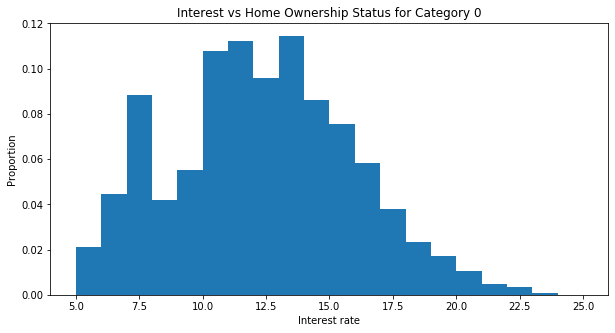

12.422590881396008
---------------------------------------------------------------------------------------------------


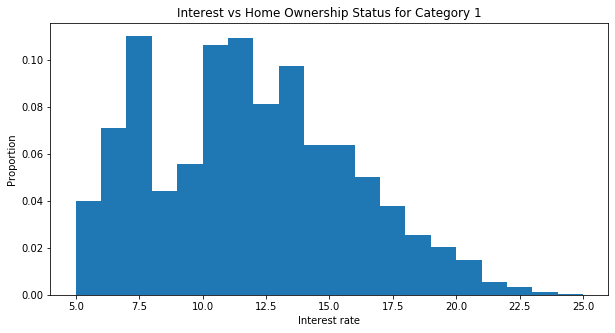

11.971913810837878
---------------------------------------------------------------------------------------------------


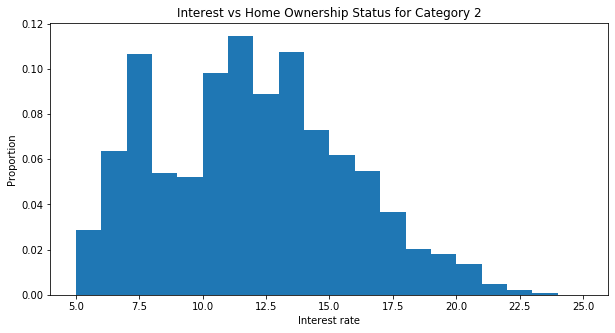

12.036127856906326
---------------------------------------------------------------------------------------------------


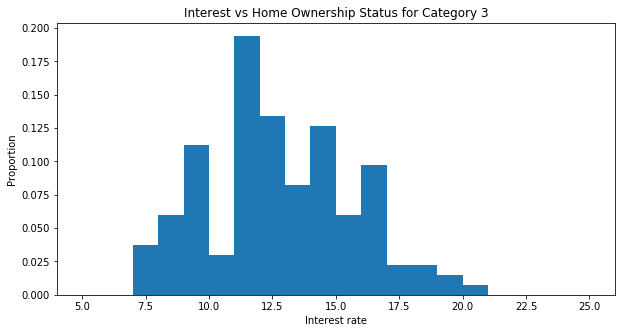

12.763059701492537
---------------------------------------------------------------------------------------------------


In [32]:
dropped_home = dropped.sort_values('home_ownership') #Did not have to do this, but I'm no degenerate
d = {}
means = []
for x in range (0,4):
    d["homesort_{0}".format(x)]= pd.DataFrame(dropped_home[dropped.home_ownership == x])    
    #sns.jointplot(x = d["homesort_{0}".format(x)]['home_ownership'], y = d["homesort_{0}".format(x)].int_rate, kind = 'kde')
    plt.hist(d["homesort_{0}".format(x)].int_rate, bins = 20, range = (5,25), normed = True)
    _ = plt.xlabel('Interest rate')
    _ = plt.ylabel('Proportion')
    _ = plt.title('Interest vs Home Ownership Status for Category ' + str(x) )
    plt.show()
    print(np.mean(d["homesort_{0}".format(x)].int_rate))
    means.append(np.mean(d["homesort_{0}".format(x)].int_rate))
    print("---------------------------------------------------------------------------------------------------")

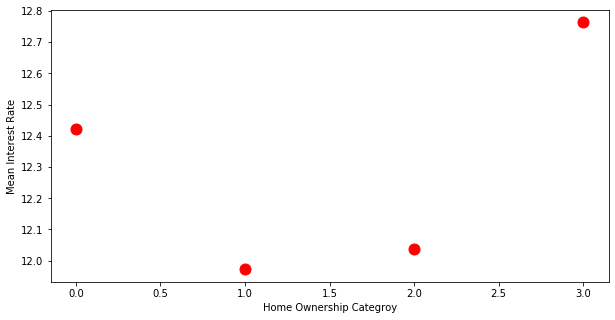

[12.422590881396008, 11.971913810837878, 12.036127856906326, 12.763059701492537]


In [35]:
plt.plot(means, linestyle = 'none', marker = '.', color = 'red', markersize = 22)
_ = plt.xlabel('Home Ownership Categroy')
_ = plt.ylabel('Mean Interest Rate')
plt.show()
print(means)

In [ ]:
# I want to just apply machine learning now, but there are some objects in the cleaned up data frame, so I am going to remove 
# those for now just to do some quick work. Maybe add them in later. Who knows.

In [ ]:
# Since our problem is not based on classification, lets just throw some unsupervised learning methods at it and a gpu and see 
# what pops out.

In [36]:
#Cleaned df with only categories with floats or ints
df_float_clean = dropped.iloc[:,[0,1,3,4,5,6,7,12,13,15,16,17,18,20,21,22,23,24,25]]
# Seperating Predictors from prediction values
df_x = df_float_clean.drop('int_rate', axis = 1)
df_y = df_float_clean.int_rate

In [42]:
# Lets create a train test split set of data in order to see how well prediction methods compare to one another
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(df_x, df_y, test_size = 0.3, random_state = 42)
df_x_train = MinMaxScaler(df_x_train)
df_x_test = MinMaxScaler(df_x_test)
df__train = MinMaxScaler(df_y_train)
df_y_test = MinMaxScaler(df_y_test)

In [ ]:
# Linear regression, decision forest, random forest, adaboost, xgboost, feed-forward network (keras and TensorFlow)
# Other methods of accuracy: rmse or mse (skleanr.metrics)

In [ ]:
# Lets apply linear regression first 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
method = LinearRegression(normalize = True)
method.fit(df_x_train, df_y_train)
print(method.score(df_x_test, df_y_test))
print(mean_squared_error(method.predict(df_x_test), df_y_test))

In [ ]:
#Lasso regression
from sklearn.linear_model import Lasso
method = Lasso(normalize = True, alpha = 0.4)
method.fit(df_x_train,df_y_train)
print(method.score(df_x_test, df_y_test))
print(mean_squared_error(method.predict(df_x_test), df_y_test))

In [ ]:
# Now decision Tree
from sklearn import tree
method = tree.DecisionTreeRegressor()
method.fit(df_x_train, df_y_train)
print(method.score(df_x_test, df_y_test))
print(mean_squared_error(method.predict(df_x_test), df_y_test))

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
method = RandomForestRegressor()
method.fit(df_x_train, df_y_train)
print(method.score(df_x_test, df_y_test))
print(mean_squared_error(method.predict(df_x_test), df_y_test))

In [ ]:
#AdaBooster
from sklearn.ensemble import AdaBoostRegressor
method = AdaBoostRegressor()
method.fit(df_x_train, df_y_train)
print(method.score(df_x_test, df_y_test))
print(mean_squared_error(method.predict(df_x_test), df_y_test))

In [ ]:
#xgboost (subsitute)
from sklearn.ensemble import GradientBoostingRegressor
method = GradientBoostingRegressor()
method.fit(df_x_train, df_y_train)
print(method.score(df_x_test, df_y_test))
print(mean_squared_error(method.predict(df_x_test), df_y_test))

In [ ]:
#feed-forward network (keras and TensorFlow) ((The hard one))
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 16} ) 
sess = tf.Session(config=config) 
keras.backend.set_session(sess)
n_cols = len((df_x_train.keys()))
def create_baseline():
    model = Sequential()
    model.add(Dense(500, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(320, activation='relu'))
    model.add(Dense(320, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])
    return model
estimator = KerasRegressor(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=5)
results = cross_val_score(estimator, df_x, df_y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

In [ ]:
print(df_y)

In [ ]:
estimator = model(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0).

In [ ]:
# We could spend forever fine tuning all these bad boys to maybe get some sort of clean prediction model, but, in the interest
# of time, I am going to only tune the 3 that did best with the default settings (Decision Tree, Random Forest,
# and GradientBoost)

In [ ]:
# Decision Tree with Previous results below this line of text
# 0.7268194991720685
# 3.748924011937409 
from sklearn import tree
method = tree.DecisionTreeRegressor(criterion = 'friedman_mse', splitter = 'best', random_state = 42,
                                    min_weight_fraction_leaf = 0.000365,)
method.fit(df_x_train, df_y_train)
print(method.score(df_x_test, df_y_test))
print(mean_squared_error(method.predict(df_x_test), df_y_test))

In [ ]:
# Attempted parameter tweeks that came out worse
# criterion = 'mae','mse'
# splitter = 'random'
# max depth = no change
# min_smaples_split = no change
# min_samples_leaf = no change 
# max_features = No change
# min_impurity_decrease = no change

In [ ]:
# Current Winner : 0.7769272917682847
#                  3.0612823014938924 

In [ ]:
# I have tweaked the model to it's best point 

In [ ]:
#grid search

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
method = RandomForestRegressor(n_estimators = 300, min_samples_split = 5, min_impurity_decrease = 0.0000049, random_state = 42)
method.fit(df_x_train, df_y_train)
print(method.score(df_x_test, df_y_test))
print(mean_squared_error(method.predict(df_x_test), df_y_test))

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
method = RandomForestRegressor(n_estimators = 400, random_state = 42)
method.fit(df_x_train, df_y_train)
print(method.score(df_x_test, df_y_test))
print(mean_squared_error(method.predict(df_x_test), df_y_test))

In [ ]:
# Current Winner :0.8652385860106885
#                 1.8493644284860018

In [ ]:
# Attempted parameter tweeks that came out worse
# criterion = Can't get it to load 
# max_depth = no change ( it seems to just be there to decrease computation time at the expense of accuracy )
# min_weight_fraction_leaf = no change
# min_samples_leaf = no change

In [ ]:
# Current Winner : 0.8811349269083054     @ n_estimators = 300 ( could be more, but it'll take a while to load)
#                  1.6312149854898659       For the sake of computation time, n_estimator will be kept at n_est = 10